In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson  70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train Without Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test Without Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train Without Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test Without Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Backward Feature Elimination using Logistic Regression

In [6]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
# sfs1 = sfs1.fit(x_train, y_train)

In [7]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [8]:
BFE_Top_4_X = x_train[['Gender', 'AGE', 'Urea', 'Cr']]
BFE_Top_5_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c']]
BFE_Top_7_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG']]
BFE_Top_9_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL']]
x_train = BFE_Top_4_X

In [9]:
BFE_Top_4_X = x_test[['Gender', 'AGE', 'Urea', 'Cr']]
BFE_Top_5_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c']]
BFE_Top_7_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG']]
BFE_Top_9_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL']]
x_test = BFE_Top_4_X

In [10]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [11]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [13]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.7375
[[28  0  4]
 [10  0  1]
 [ 6  0 31]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        32
           1       0.00      0.00      0.00        11
           2       0.86      0.84      0.85        37

    accuracy                           0.74        80
   macro avg       0.50      0.57      0.53        80
weighted avg       0.65      0.74      0.69        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

In [15]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.6528093434343434
f1 Score  0.6875450612833454
Recall  0.7375
Specificity/TNR: 1.0
Cohen Kappa: 0.540983606557377
AUC Score  0.8076767680218134


C:\Users\babar\AppData\Local\Temp\ipykernel_13452\2519269152.py:21: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\2519269152.py:29: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\2519269152.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7375,
  0.6528093434343434,
  0.7375,
  0.6875450612833454,
  0.540983606557377,
  0.8076767680218134]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.01595907, 0.01036668, 0.03829443, 0.01438334, 0.01436017,
        0.01050544, 0.01266859, 0.01247189, 0.01605122, 0.01027181,
        0.00957606, 0.0128628 , 0.01555281, 0.01056595, 0.00946968,
        0.01285791, 0.01506131, 0.01047673, 0.00948596, 0.01276228,
        0.01426487, 0.01126635, 0.05963957, 0.01436131, 0.01884928,
        0.01555669, 0.01605597, 0.01565714, 0.0194458 , 0.01296382,
        0.01286457, 0.01755259, 0.02273738, 0.0167546 , 0.01376295,
        0.01785123, 0.02024562, 0.01655512, 0.01196699, 0.01226621,
        0.01525831, 0.01229944, 0.08248403, 0.01129389, 0.01314867,
        0.01316364, 0.01109788, 0.01146693, 0.01386597, 0.01196363,
        0.00927227, 0.0128623 , 0.01416664, 0.01166885, 0.00897093,
        0.01236241, 0.01355774, 0.01163068, 0.00918787, 0.01153743,
        0.01575124, 0.01303232, 0.11200013, 0.01147108, 0.01456752,
        0.01296196, 0.01057034, 0.01210206, 0.01411865, 0.014059  ,
        0.0091733 , 0.01288931,

In [18]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015959,0.001838,0.002494,0.000804,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.789474,0.789474,...,0.736842,0.666667,0.611111,0.722222,0.777778,0.888889,0.833333,0.750000,0.078505,1
1,0.010367,0.001354,0.001998,0.000892,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.631579,0.789474,...,0.684211,0.722222,0.722222,0.611111,0.666667,0.777778,0.555556,0.684503,0.069063,47
2,0.038294,0.006052,0.001998,0.000447,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.684211,0.578947,...,0.684211,0.722222,0.666667,0.444444,0.722222,0.777778,0.777778,0.669006,0.094728,182
3,0.014383,0.002914,0.002893,0.001636,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.631579,0.421053,...,0.578947,0.666667,0.555556,0.611111,0.388889,0.611111,0.500000,0.564912,0.094592,274
4,0.014360,0.001425,0.002295,0.001184,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.631579,0.789474,...,0.684211,0.777778,0.666667,0.611111,0.666667,0.777778,0.555556,0.684503,0.073396,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.012670,0.001722,0.001896,0.000299,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.578947,0.736842,...,0.578947,0.777778,0.611111,0.500000,0.666667,0.722222,0.555556,0.635965,0.084120,222
396,0.015154,0.002484,0.002199,0.000597,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,294
397,0.029122,0.005272,0.002397,0.002247,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.631579,0.789474,...,0.684211,0.722222,0.722222,0.611111,0.666667,0.777778,0.555556,0.684503,0.069063,47
398,0.010967,0.002359,0.002294,0.000779,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,294


In [19]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.750000
1,1,linear,0.684503
2,1,poly,0.669006
3,1,sigmoid,0.564912
4,1,rbf,0.684503
...,...,...,...
395,20,sigmoid,0.635965
396,20,rbf,0.495029
397,20,linear,0.684503
398,20,poly,0.495029


In [20]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.7499999999999999
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [21]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        32
           1       0.43      0.27      0.33        11
           2       0.88      0.81      0.85        37

    accuracy                           0.73        80
   macro avg       0.65      0.62      0.63        80
weighted avg       0.72      0.72      0.72        80



In [22]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.7234270631329455
f1 Score  0.718368544600939
Recall  0.725
Specificity/TNR: 0.8620689655172413
Cohen Kappa: 0.5389048991354468
AUC Score  0.8148317303279701


In [23]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7499999999999999,
  0.7234270631329455,
  0.725,
  0.718368544600939,
  0.5389048991354468,
  0.8148317303279701]}

# Logistic Regression Train, Test

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.712
Testing Accuracy: 0.700
[[26  0  6]
 [ 7  0  4]
 [ 6  1 30]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.00      0.00      0.00        11
           2       0.75      0.81      0.78        37

    accuracy                           0.70        80
   macro avg       0.47      0.54      0.50        80
weighted avg       0.61      0.70      0.65        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.6135416666666667
f1 Score  0.6533473568684836
Recall  0.7
Specificity/TNR: 1.0
Cohen Kappa: 0.4755531275607757
AUC Score  0.8048345407479477


C:\Users\babar\AppData\Local\Temp\ipykernel_13452\607833638.py:20: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\607833638.py:28: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\607833638.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


In [26]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7375,
  0.6528093434343434,
  0.7375,
  0.6875450612833454,
  0.540983606557377,
  0.8076767680218134],
 'LR': [0.7,
  0.6135416666666667,
  0.7,
  0.6533473568684836,
  0.4755531275607757,
  0.8048345407479477]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [27]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00379326, 0.0069792 , 0.0040904 , 0.00388935, 0.00309341,
        0.00825305, 0.00347655, 0.00478339, 0.00318685, 0.00938044,
        0.00328243, 0.00469179, 0.00358684, 0.01106687, 0.00317245,
        0.0047869 , 0.00368402, 0.00888588, 0.00277474, 0.00488172,
        0.00297577, 0.00508614, 0.00278497, 0.0041806 , 0.00307779,
        0.00478945, 0.00318153, 0.00438333, 0.00277836, 0.00469267,
        0.00308373, 0.00458963, 0.00318489, 0.00488605, 0.0030823 ,
        0.00437407, 0.00308609, 0.00510752, 0.00288787, 0.00428724]),
 'std_fit_time': array([0.00115986, 0.00141228, 0.00175045, 0.00104095, 0.00069781,
        0.00115644, 0.00136384, 0.0011641 , 0.00075479, 0.00120142,
        0.00109186, 0.00078142, 0.00048998, 0.00253651, 0.00107368,
        0.00074083, 0.0007773 , 0.00129583, 0.00074821, 0.0009379 ,
        0.00077119, 0.00103474, 0.00086694, 0.00060939, 0.00083363,
        0.00107009, 0.00088254, 0.00080053, 0.00059655, 0.00064228,
        0.001

In [28]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015959,0.001838,0.002494,0.000804,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.789474,0.789474,...,0.736842,0.666667,0.611111,0.722222,0.777778,0.888889,0.833333,0.750000,0.078505,1
1,0.010367,0.001354,0.001998,0.000892,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.631579,0.789474,...,0.684211,0.722222,0.722222,0.611111,0.666667,0.777778,0.555556,0.684503,0.069063,47
2,0.038294,0.006052,0.001998,0.000447,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.684211,0.578947,...,0.684211,0.722222,0.666667,0.444444,0.722222,0.777778,0.777778,0.669006,0.094728,182
3,0.014383,0.002914,0.002893,0.001636,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.631579,0.421053,...,0.578947,0.666667,0.555556,0.611111,0.388889,0.611111,0.500000,0.564912,0.094592,274
4,0.014360,0.001425,0.002295,0.001184,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.631579,0.789474,...,0.684211,0.777778,0.666667,0.611111,0.666667,0.777778,0.555556,0.684503,0.073396,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.012670,0.001722,0.001896,0.000299,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.578947,0.736842,...,0.578947,0.777778,0.611111,0.500000,0.666667,0.722222,0.555556,0.635965,0.084120,222
396,0.015154,0.002484,0.002199,0.000597,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,294
397,0.029122,0.005272,0.002397,0.002247,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.631579,0.789474,...,0.684211,0.722222,0.722222,0.611111,0.666667,0.777778,0.555556,0.684503,0.069063,47
398,0.010967,0.002359,0.002294,0.000779,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,294


In [29]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.750000
1,1,linear,0.684503
2,1,poly,0.669006
3,1,sigmoid,0.564912
4,1,rbf,0.684503
...,...,...,...
395,20,sigmoid,0.635965
396,20,rbf,0.495029
397,20,linear,0.684503
398,20,poly,0.495029


In [30]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.6903508771929825
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [31]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        32
           1       0.00      0.00      0.00        11
           2       0.73      0.86      0.79        37

    accuracy                           0.70        80
   macro avg       0.46      0.54      0.50        80
weighted avg       0.60      0.70      0.65        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.603030303030303
f1 Score  0.6477850399419027
Recall  0.7
Specificity/TNR: 1.0
Cohen Kappa: 0.4696132596685083
AUC Score  0.7967381213913379


C:\Users\babar\AppData\Local\Temp\ipykernel_13452\4076961341.py:20: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\4076961341.py:28: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_13452\4076961341.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7499999999999999,
  0.7234270631329455,
  0.725,
  0.718368544600939,
  0.5389048991354468,
  0.8148317303279701],
 'LR': [0.6903508771929825,
  0.603030303030303,
  0.7,
  0.6477850399419027,
  0.4696132596685083,
  0.7967381213913379]}

# KNN Train, Test

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7
0.7
[[22  7  3]
 [ 5  5  1]
 [ 7  1 29]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        32
           1       0.38      0.45      0.42        11
           2       0.88      0.78      0.83        37

    accuracy                           0.70        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.72      0.70      0.71        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.7181475387357741
f1 Score  0.7071726190476191
Recall  0.7
Specificity/TNR: 0.7586206896551724
Cohen Kappa: 0.5136778115501519
AUC Score  0.753326388865167


In [36]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7375,
  0.6528093434343434,
  0.7375,
  0.6875450612833454,
  0.540983606557377,
  0.8076767680218134],
 'LR': [0.7,
  0.6135416666666667,
  0.7,
  0.6533473568684836,
  0.4755531275607757,
  0.8048345407479477],
 'KNN': [0.7,
  0.7181475387357741,
  0.7,
  0.7071726190476191,
  0.5136778115501519,
  0.753326388865167]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [37]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.00887566, 0.00698171, 0.00638285, 0.00688138, 0.00728023,
        0.00947492, 0.00728016, 0.00688074, 0.00678301, 0.0088757 ,
        0.00987415, 0.00897646, 0.00757968, 0.00927505, 0.01027296,
        0.0093744 , 0.00728064, 0.00618324, 0.00917573, 0.00698118,
        0.00538568, 0.00728104, 0.00668247, 0.00558434, 0.00568414,
        0.00678189, 0.00638289, 0.00688155, 0.00867651, 0.00728033,
        0.00578458, 0.0060838 , 0.00628295, 0.0061831 , 0.00638347,
        0.00668154, 0.00648229, 0.0065814 , 0.00628302, 0.00648174,
        0.0064837 , 0.00558555, 0.00648232, 0.00558579, 0.00668218,
        0.00668216, 0.00678277, 0.00787923, 0.00568435, 0.00578504,
        0.00727999, 0.00618341, 0.00568593, 0.00608349, 0.0062834 ,
        0.00727983, 0.00538511, 0.00608356, 0.00628352, 0.00728052,
        0.00558391, 0.00648303, 0.00528536, 0.00648215, 0.0054858 ,
        0.00827725, 0.00668151, 0.00698111, 0.00618346, 0.00728006,
        0.00648181, 0.00618341,

In [38]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008876,0.003136,0.007979,0.002231,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.578947,0.631579,...,0.736842,0.722222,0.611111,0.611111,0.555556,0.833333,0.666667,0.663158,0.079635,112
1,0.006982,0.001669,0.005385,0.002793,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.578947,0.631579,...,0.736842,0.722222,0.611111,0.611111,0.555556,0.833333,0.666667,0.663158,0.079635,112
2,0.006383,0.001017,0.007879,0.004874,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.421053,0.578947,...,0.684211,0.722222,0.555556,0.500000,0.555556,0.944444,0.777778,0.652924,0.150527,118
3,0.006881,0.003072,0.004089,0.000941,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.578947,0.631579,...,0.736842,0.666667,0.611111,0.611111,0.555556,0.888889,0.666667,0.663158,0.090519,112
4,0.007280,0.002187,0.006084,0.002501,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.684211,0.684211,...,0.736842,0.666667,0.611111,0.555556,0.777778,0.833333,0.833333,0.717251,0.088525,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.007380,0.004596,0.004089,0.000941,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.842105,0.842105,...,0.736842,0.722222,0.611111,0.777778,0.777778,0.944444,0.833333,0.787719,0.084160,1
116,0.008278,0.005678,0.005586,0.001953,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.789474,0.789474,...,0.736842,0.722222,0.555556,0.777778,0.777778,0.833333,0.833333,0.760526,0.075995,39
117,0.007880,0.005054,0.007978,0.005333,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.842105,0.842105,...,0.736842,0.722222,0.611111,0.777778,0.777778,0.944444,0.833333,0.787719,0.084160,1
118,0.008078,0.004559,0.005885,0.003438,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.789474,0.789474,...,0.736842,0.722222,0.555556,0.777778,0.777778,0.833333,0.833333,0.755263,0.075629,49


In [39]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.663158
1,minkowski,1,0.663158
2,minkowski,2,0.652924
3,minkowski,2,0.663158
4,minkowski,3,0.717251
...,...,...,...
115,manhattan,18,0.787719
116,manhattan,19,0.760526
117,manhattan,19,0.787719
118,manhattan,20,0.755263


In [40]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.787719298245614
{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}


In [41]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        32
           1       0.40      0.36      0.38        11
           2       0.86      0.81      0.83        37

    accuracy                           0.70        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.70      0.70      0.70        80



In [42]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.7028571428571428
f1 Score  0.7004841862117981
Recall  0.7
Specificity/TNR: 0.7857142857142857
Cohen Kappa: 0.5045161290322581
AUC Score  0.8003283040054715


In [43]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.7499999999999999,
  0.7234270631329455,
  0.725,
  0.718368544600939,
  0.5389048991354468,
  0.8148317303279701],
 'LR': [0.6903508771929825,
  0.603030303030303,
  0.7,
  0.6477850399419027,
  0.4696132596685083,
  0.7967381213913379],
 'KNN': [0.787719298245614,
  0.7028571428571428,
  0.7,
  0.7004841862117981,
  0.5045161290322581,
  0.8003283040054715]}

# Result of all classifiers

In [44]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.737500,0.700000,0.700000
1,Precision,0.652809,0.613542,0.718148
2,Recall,0.737500,0.700000,0.700000
3,F1 Score,0.687545,0.653347,0.707173
4,Cohen Kappa,0.540984,0.475553,0.513678
5,AUC,0.807677,0.804835,0.753326


# Result of all classifiers after hyperparameter tuning 

In [45]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.750000,0.690351,0.787719
1,Precision,0.723427,0.603030,0.702857
2,Recall,0.725000,0.700000,0.700000
3,F1 Score,0.718369,0.647785,0.700484
4,Cohen Kappa,0.538905,0.469613,0.504516
5,AUC,0.814832,0.796738,0.800328


# Extracting Result

In [46]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying BFE Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying Hyperparameter BFE Top 4 features.csv")

# ROC Curve

In [47]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

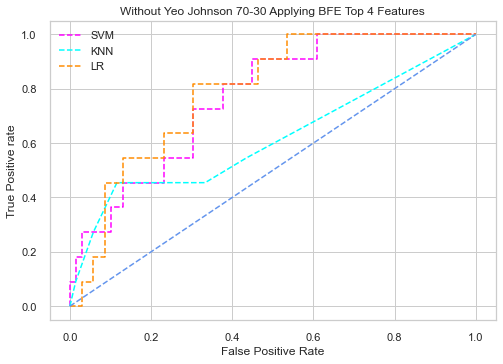

In [48]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 70-30 Applying BFE Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC Without YJ/Without Yeo Johnson 70-30 Applying BFE Top 4 Features.png", dpi=300)

plt.show();